Desafio 32: Análise de Estoque de Produtos

📂 Dataset: Informações de estoque, categorias e preços de produtos.
Colunas: Produto, Categoria, Quantidade_Estoque, Preço_Unitario, Fornecedor

🎯 Tarefas:

Corrija possíveis erros nas colunas Quantidade_Estoque e Preço_Unitario.

Quais produtos estão com estoque zerado ou negativo?

Qual fornecedor possui a maior variedade de produtos?

Qual categoria possui o maior estoque total (soma das quantidades)?

Crie um gráfico de pizza mostrando a distribuição de categorias no estoque.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dia_32_estoque_produtos.csv")
df.head()

,Produto,Categoria,Quantidade_Estoque,Preço_Unitario,Fornecedor
0,Produto_2,Brinquedos,86.0,599.82,Fornecedor_B
1,Produto_3,Móveis,175.0,520.31,Fornecedor_B
2,Produto_4,Brinquedos,203.0,445.2,Fornecedor_C
3,Produto_5,Móveis,99.0,837.59,Fornecedor_C
4,Produto_6,Brinquedos,105.0,640.87,Fornecedor_A


In [11]:
#Corrija possíveis erros nas colunas Quantidade_Estoque e Preço_Unitario.
df["Quantidade_Estoque"] = pd.to_numeric(df["Quantidade_Estoque"], errors="coerce")
df["Quantidade_Estoque"] = df["Quantidade_Estoque"].fillna(0)

df["Preço_Unitario"] = pd.to_numeric(df["Preço_Unitario"], errors="coerce")
df["Preço_Unitario"] = df["Preço_Unitario"].fillna(df.groupby("Categoria")["Preço_Unitario"].transform("mean")).round(2)

In [27]:
#Quais produtos estão com estoque zerado ou negativo?
estoque0 = df[df["Quantidade_Estoque"] <= 0]["Produto"]
print(f"O produto que está com estoque ausente é: {estoque0.max()}")

O produto que está com estoque ausente é: Produto_14


In [18]:
#Qual fornecedor possui a maior variedade de produtos?
fornecedorVariedade = df.groupby("Fornecedor")["Produto"].nunique()
print(f"O fornecedor com a maior variedade de produtos é: {fornecedorVariedade.idxmax()}")

O fornecedor com a maior variedade de produtos é: Fornecedor_A


In [20]:
#Qual categoria possui o maior estoque total (soma das quantidades)?
categoriaEstoque = df.groupby("Categoria")["Quantidade_Estoque"].sum()
print(f"A categoria com o maior estoque total é: {categoriaEstoque.idxmax()}")

A categoria com o maior estoque total é: Móveis


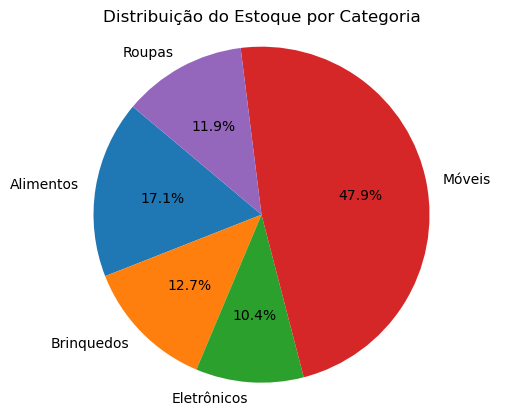

In [29]:
#Crie um gráfico de pizza mostrando a distribuição de categorias no estoque.
plt.pie(categoriaEstoque, labels=categoriaEstoque.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição do Estoque por Categoria')
plt.axis('equal')
plt.show()